# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam , RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import image

from PIL import Image

from sklearn.model_selection import GridSearchCV

from IPython.display import Image 

Using TensorFlow backend.


In [2]:
# mounting google drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Building Dataset**

In [0]:
np.random.seed(34)

In [0]:
# Image Data Generator for training data
train_datagen = ImageDataGenerator(rotation_range=90,
                                   width_shift_range=0.08,
                                   shear_range=0.3,
                                   height_shift_range=0.08,
                                   rescale = 1./255,
                                   zoom_range = 0.08,
                                   horizontal_flip = True)

In [0]:
# Image Data Generator for validation data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
# Reading Files for training
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/train',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1005 images belonging to 2 classes.


In [7]:
# Reading files for test
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/test',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 450 images belonging to 2 classes.


**Model**

In [0]:
# Building a CNN model
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (128,128, 3),kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', padding='same', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(units = 2, activation = 'softmax'))



In [0]:
# Using RMSprop as optimizer
optimizer=RMSprop(lr=0.001,rho=0.9)

In [10]:
classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
__________

**Fitting the model**

In [0]:
# Reducing Learning Rate when there is no learning
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [12]:
# Fitting model with train and validation set
history=classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                        validation_data = test_set,
                        validation_steps = 45,
                               callbacks=[learning_rate_reduction] )

Epoch 1/20
100/100 [==============================] - 630s 6s/step - loss: 0.6852 - acc: 0.6403 - val_loss: 0.6271 - val_acc: 0.7153
Epoch 2/20
100/100 [==============================] - 16s 155ms/step - loss: 0.5855 - acc: 0.7303 - val_loss: 0.5210 - val_acc: 0.7280
Epoch 3/20
100/100 [==============================] - 16s 157ms/step - loss: 0.5280 - acc: 0.7452 - val_loss: 0.4214 - val_acc: 0.8074
Epoch 4/20
100/100 [==============================] - 16s 156ms/step - loss: 0.5128 - acc: 0.7554 - val_loss: 0.4639 - val_acc: 0.8102
Epoch 5/20
100/100 [==============================] - 15s 153ms/step - loss: 0.4810 - acc: 0.7833 - val_loss: 0.4117 - val_acc: 0.8343
Epoch 6/20
100/100 [==============================] - 17s 169ms/step - loss: 0.4789 - acc: 0.7880 - val_loss: 0.4095 - val_acc: 0.8088
Epoch 7/20
100/100 [==============================] - 16s 158ms/step - loss: 0.4679 - acc: 0.7910 - val_loss: 0.4513 - val_acc: 0.8003
Epoch 8/20
100/100 [==============================] - 16s

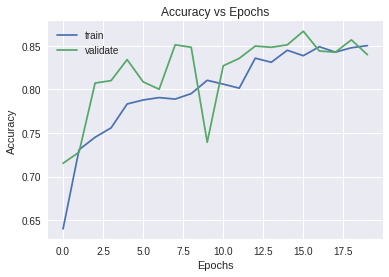

In [13]:
# Plotting Accuracy vs epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(['train','validate'])
plt.show()

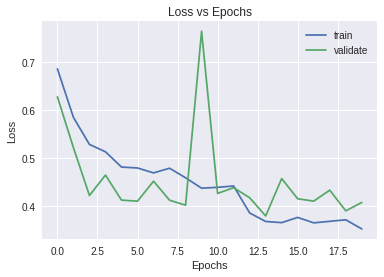

In [14]:
# Plotting Loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['train','validate'])
plt.show()

**Evaluate / Predict**

In [15]:
predict_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = predict_datagen.flow_from_directory('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict',
                                                 target_size = (128,128),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 478 images belonging to 2 classes.


In [0]:
#Evaluating on test data set
acc, loss = classifier.evaluate_generator(prediction_set)

In [17]:
print("Test Accuracy = %.1f"%(acc*100))

Test Accuracy = 77.5


Predicted Class = [1]


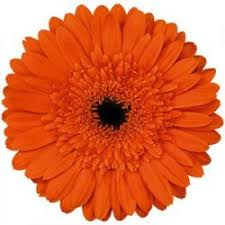

In [18]:
# Fresh Image
test_image1 = image.load_img('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_336.jpg', target_size = (128, 128))

test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
res1=classifier.predict_classes(test_image1)
print("Predicted Class =",res1)
Image(filename='/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_336.jpg')

Predicted Class = [0]


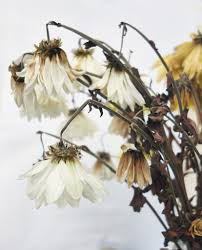

In [19]:
# Wilted Flower

test_image2 = image.load_img('/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_281.jpg', target_size = (128, 128))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
res2 = classifier.predict_classes(test_image2)
print("Predicted Class =",res2)

Image(filename='/content/drive/My Drive/TCS/Machine Vision Challenge/Flower Freshness Index/data/predict/images_281.jpg')